In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
from collections import Counter

In [3]:
features = pd.read_csv('../data/features_data_cleaned.csv')

In [4]:
#reminder of column names 
features.columns

Index(['name', 'price', 'neighbourhood_cleansed', 'room_type',
       'minimum_nights', 'accommodates', 'bedrooms', 'beds', 'bathroom_count',
       'bathroom_type'],
      dtype='object')

# Find the general distribution of each attribute

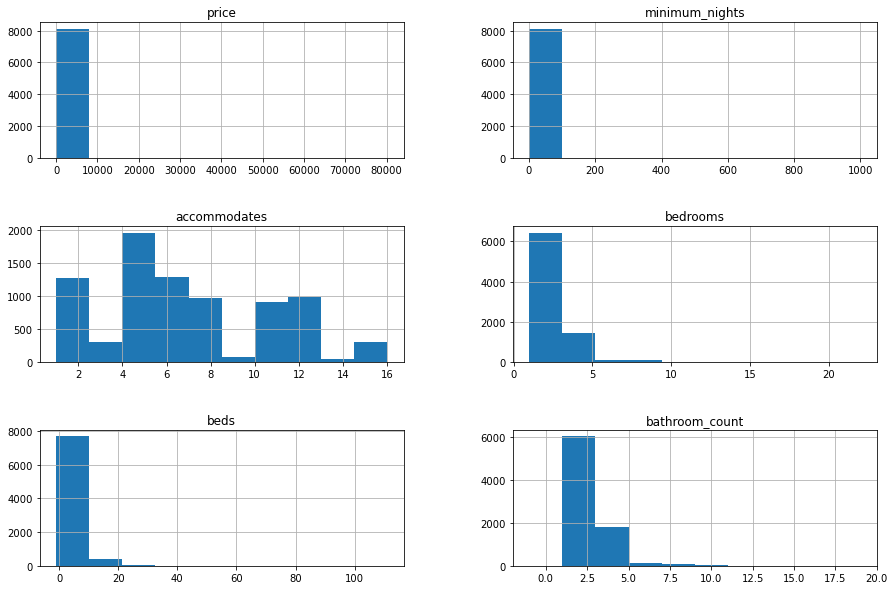

In [5]:
#find the distrubution of values for each column 
features.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [6]:
#.... the charts above do not do a good job of explaining the columns distributions... they seem to be more categorial rather than continuous
#create bar charts for each column except price since it will have too many categories

<AxesSubplot:>

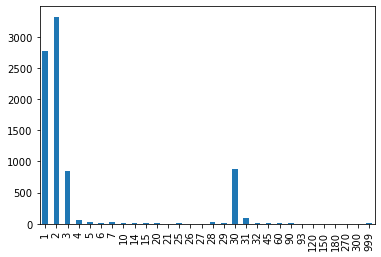

In [7]:
features['minimum_nights'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

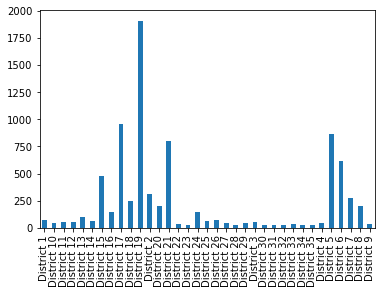

In [8]:
features['neighbourhood_cleansed'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

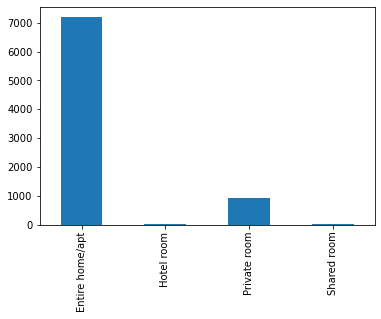

In [9]:
features['room_type'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

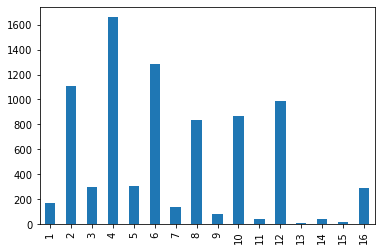

In [10]:
features['accommodates'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

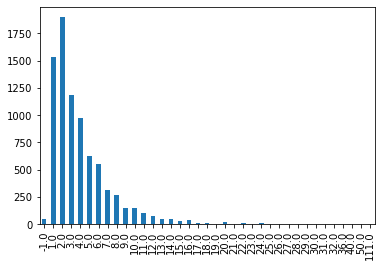

In [11]:
features['beds'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

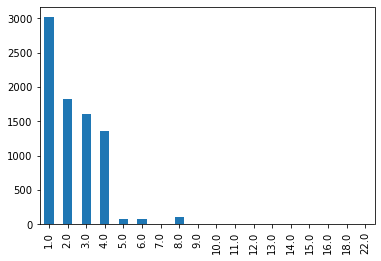

In [12]:
features['bedrooms'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

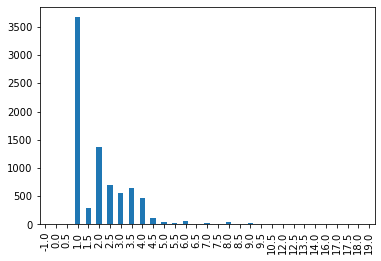

In [13]:
features['bathroom_count'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

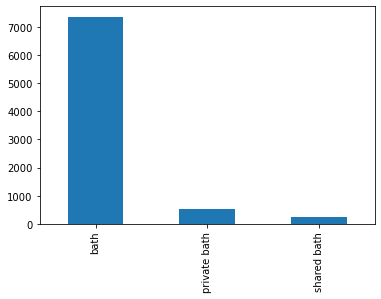

In [14]:
features['bathroom_type'].value_counts().sort_index().plot(kind='bar')

# Find the correlation between atrributes and price

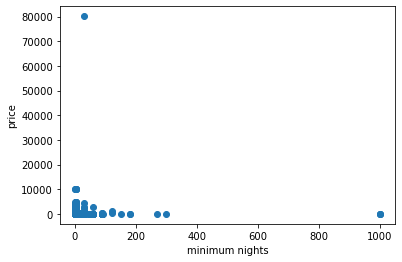

In [15]:
plt.scatter(features['minimum_nights'], features['price'])
plt.xlabel('minimum nights')
plt.ylabel('price')
plt.show()

In [16]:
#remove the price outlier and try again to visualize better 
min_night_price_outlier = features.sort_values('price', ascending= False).head(1)
min_night_price_outlier

,name,price,neighbourhood_cleansed,room_type,minimum_nights,accommodates,bedrooms,beds,bathroom_count,bathroom_type
287,"Large Studio w/ Washer, Dryer, Gas Range, Vintage",80125.0,District 13,Entire home/apt,30,4,1.0,1.0,1.0,bath


In [17]:
clean_price_feat = pd.DataFrame()
clean_price_feat = features.drop(index=287)

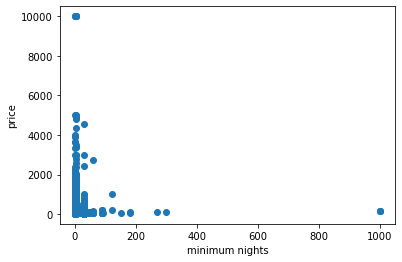

In [18]:
plt.scatter(clean_price_feat['minimum_nights'], clean_price_feat['price'])
plt.xlabel('minimum nights')
plt.ylabel('price')
plt.show()

In [19]:
#This was used to clean the district label and seperate out just the number variable
another = features
another[['label','district']] = features['neighbourhood_cleansed'].str.split(" ", 1, expand=True)

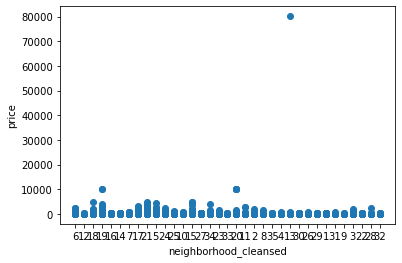

In [20]:
plt.scatter(another['district'],features['price'])
plt.xlabel('neighborhood_cleansed')
plt.ylabel('price')
plt.show()

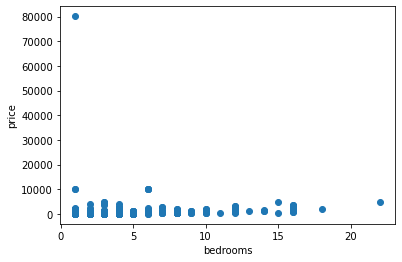

In [21]:
plt.scatter(features['bedrooms'],features['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

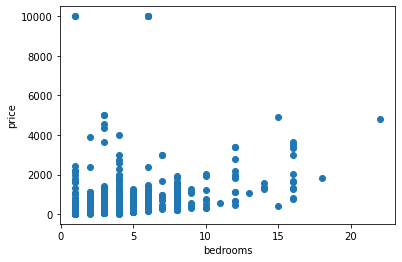

In [22]:
#without the price outlier
plt.scatter(clean_price_feat['bedrooms'],clean_price_feat['price'])
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

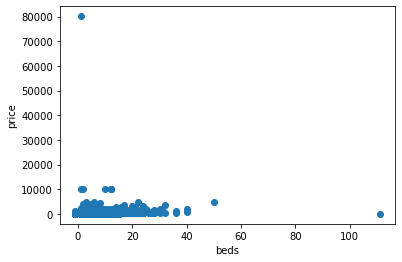

In [23]:
plt.scatter(features['beds'],features['price'])
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

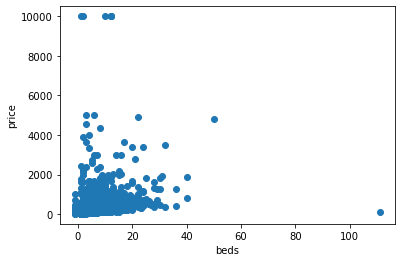

In [24]:
#without the price outlier
plt.scatter(clean_price_feat['beds'],clean_price_feat['price'])
plt.xlabel('beds')
plt.ylabel('price')
plt.show()

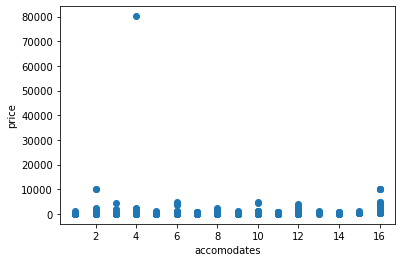

In [25]:
plt.scatter(features['accommodates'],features['price'])
plt.xlabel('accomodates')
plt.ylabel('price')
plt.show()

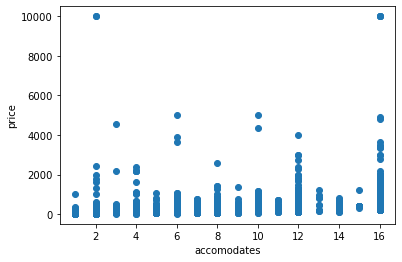

In [26]:
#without the price outlier
plt.scatter(clean_price_feat['accommodates'],clean_price_feat['price'])
plt.xlabel('accomodates')
plt.ylabel('price')
plt.show()

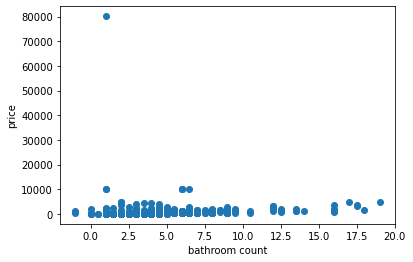

In [27]:
plt.scatter(features['bathroom_count'],features['price'])
plt.xlabel('bathroom count')
plt.ylabel('price')
plt.show()

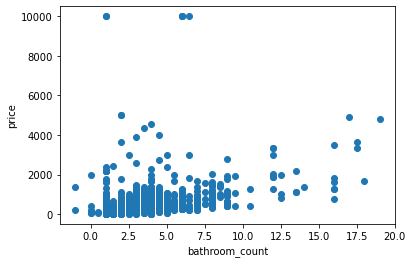

In [28]:
#without the price outlier
plt.scatter(clean_price_feat['bathroom_count'],clean_price_feat['price'])
plt.xlabel('bathroom_count')
plt.ylabel('price')
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

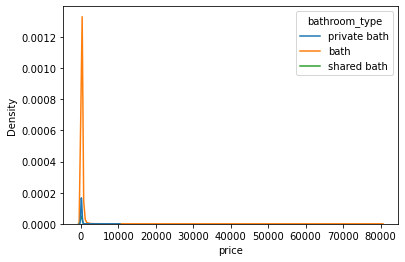

In [29]:
#create kdeplot for bathoom_type
sns.kdeplot(data=features, x = 'price', hue='bathroom_type')

<AxesSubplot:xlabel='price', ylabel='Density'>

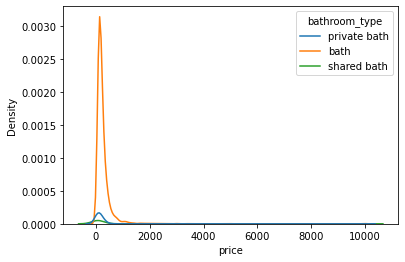

In [30]:
#zoom in by removing the price outlier
sns.kdeplot(data=clean_price_feat, x = 'price', hue='bathroom_type')

<AxesSubplot:xlabel='price', ylabel='Density'>

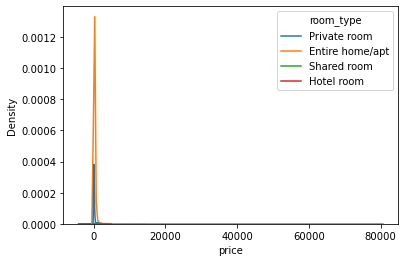

In [31]:
#create kdeplots for room_typ
sns.kdeplot(data=features, x = 'price', hue='room_type')

<AxesSubplot:xlabel='price', ylabel='Density'>

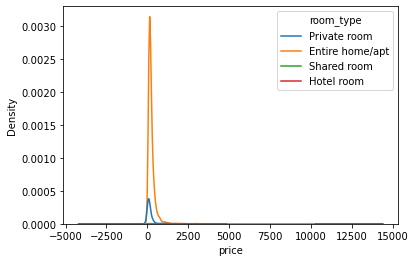

In [32]:
#zoom in by removing the price outlier
sns.kdeplot(data=clean_price_feat, x = 'price', hue='room_type')

# Correlation between all variables

In [33]:
# correlation matrix 
features.corr()

,price,minimum_nights,accommodates,bedrooms,beds,bathroom_count
price,1.000000,-0.009624,0.133185,0.157453,0.120949,0.165750
minimum_nights,-0.009624,1.000000,-0.132625,-0.061508,-0.092085,-0.063894
accommodates,0.133185,-0.132625,1.000000,0.830248,0.766874,0.784611
bedrooms,0.157453,-0.061508,0.830248,1.000000,0.771477,0.903611
beds,0.120949,-0.092085,0.766874,0.771477,1.000000,0.752387
bathroom_count,0.165750,-0.063894,0.784611,0.903611,0.752387,1.000000


<AxesSubplot:>

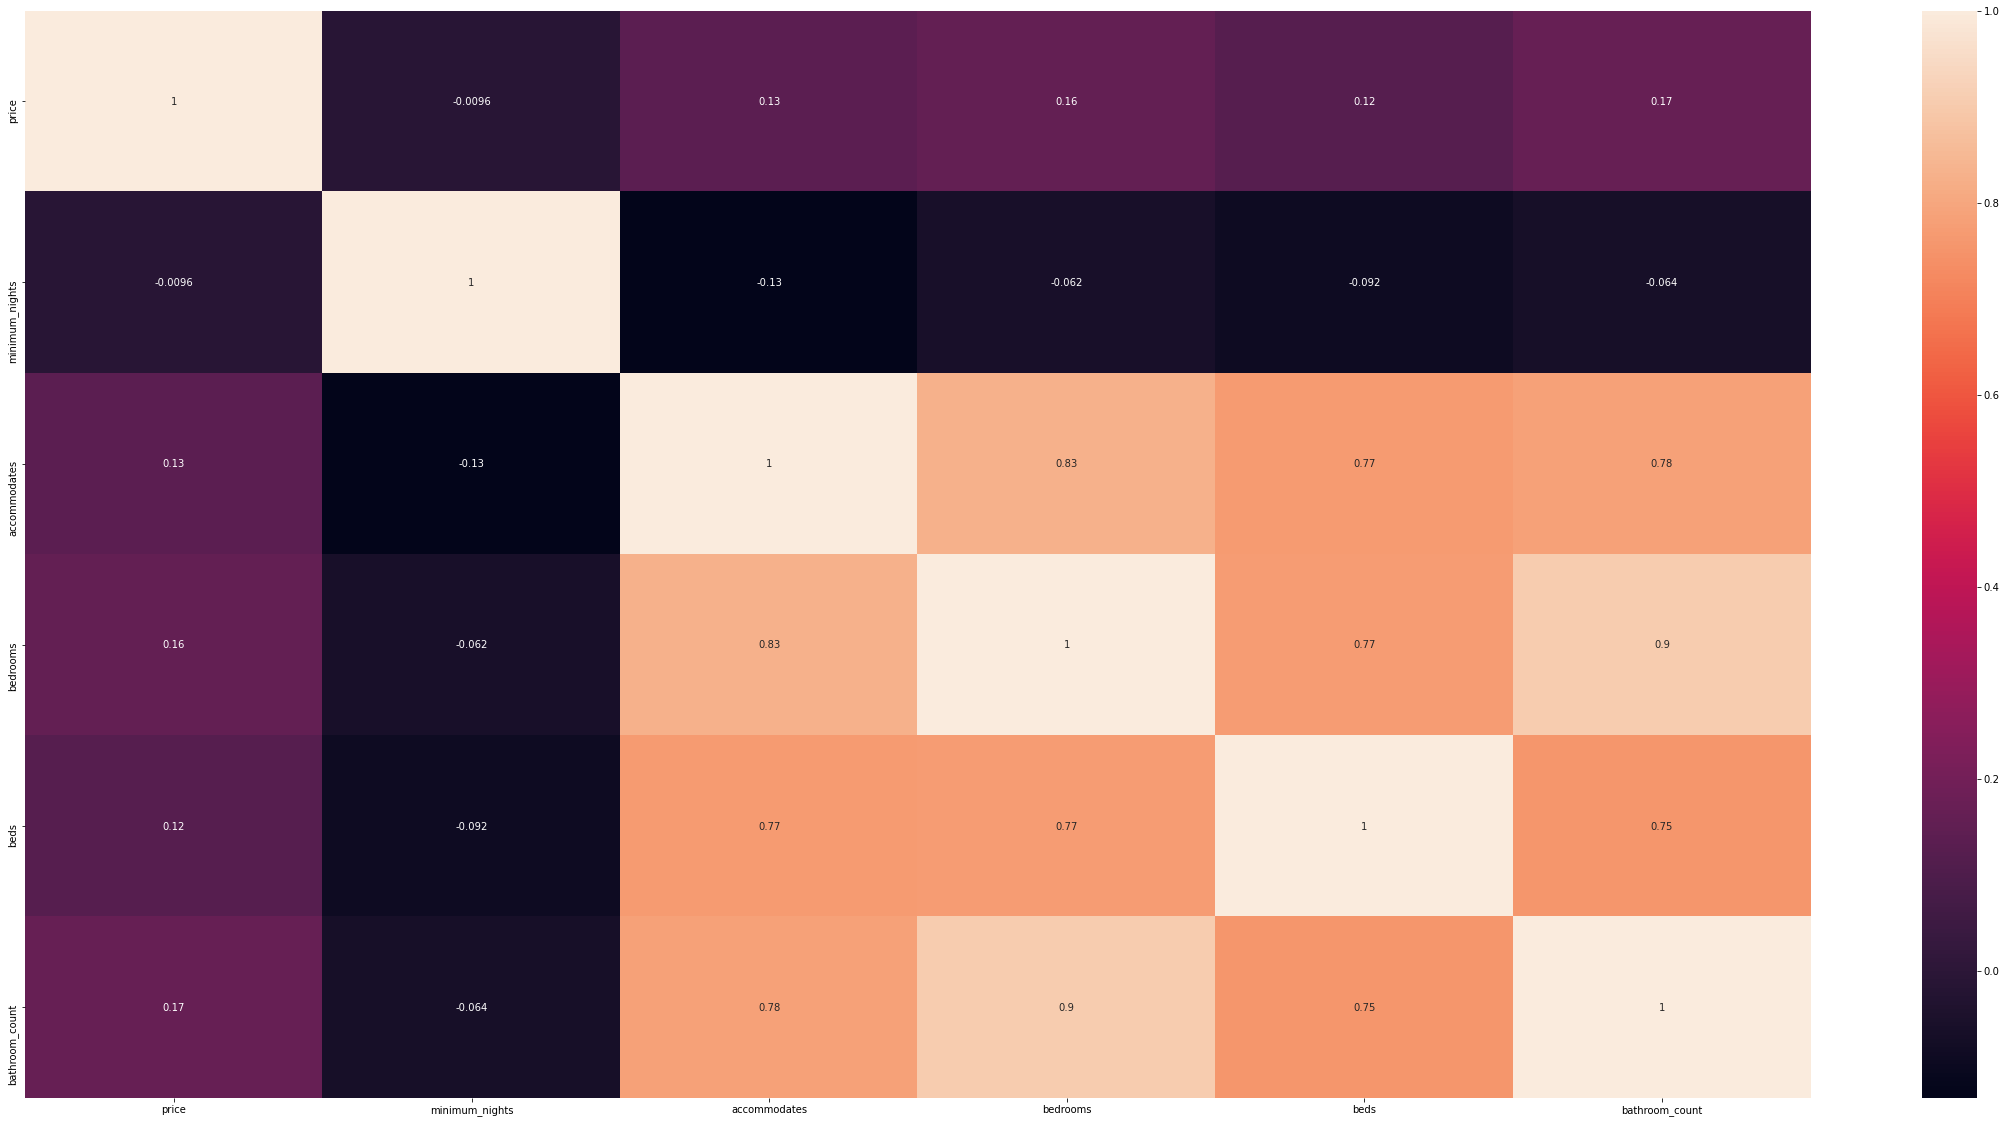

In [34]:
#heatmap
plt.figure(figsize=(40,20))
sns.heatmap(features.corr(), annot=True)

# Digging further into specific relationships

In [35]:
# understand the relationship between price and neighborhood by taking the mean of each group
features.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending = False)

neighbourhood_cleansed
District 13    931.378641
District 34    477.500000
District 20    406.439394
District 23    296.739130
District 11    296.520000
District 21    284.062735
District 17    272.772419
District 19    269.080304
District 18    266.687530
District 5     243.752900
District 25    243.254237
District 3     238.203704
District 28    233.913043
District 15    227.722689
District 24    226.136054
District 2     222.241314
District 6     205.923203
District 7     177.309600
District 10    170.586957
District 8     169.803030
District 4     159.707317
District 1     158.088235
District 26    154.128571
District 22    151.493226
District 27    146.395349
District 14    143.358209
District 16    143.095946
District 30    142.413793
District 9     137.631579
District 35    136.769231
District 32    126.250000
District 29    117.541667
District 31    108.103448
District 33    105.909091
District 12     85.824561
Name: price, dtype: float64

In [36]:
#the range of prices depending on districts is definitely noticeable with a range between 85-477 depending on district
# is this due to district alone or is it based off of other characteristics such as it being smaller houses or less of a sample size

In [37]:
# understand the relationship between price and room type/ house type by taking the mean of each group
features.groupby(['room_type'])['price'].mean().sort_values(ascending = False)

room_type
Hotel room         1044.875000
Entire home/apt     258.487179
Private room        182.515987
Shared room         168.700000
Name: price, dtype: float64

In [38]:
# since bathroom_count is the most correlated with price lets see how many bathrooms are in the rooms of these districts 
features.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().sort_values(ascending = False)


neighbourhood_cleansed  room_type      
District 19             Hotel room         10000.000000
District 13             Entire home/apt     1128.702381
District 28             Private room         537.400000
District 34             Entire home/apt      534.842105
District 20             Entire home/apt      438.972222
                                               ...     
District 9              Private room          48.666667
District 32             Private room          47.875000
District 14             Private room          47.222222
District 23             Private room          30.000000
District 12             Shared room           27.500000
Name: price, Length: 78, dtype: float64